In [1]:
import gensim.downloader as api
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

model = api.load("word2vec-google-news-300")
print("Loaded Google News Word2Vec.")

Loaded Google News Word2Vec.


In [2]:
words = ['king', 'queen', 'man', 'woman', 'computer', 'data', 'apple', 'banana']
for w in words:
    if w in model:
        print(f"{w}: Top 3 similar words: {model.most_similar(w, topn=3)}")

king: Top 3 similar words: [('kings', 0.7138045430183411), ('queen', 0.6510956883430481), ('monarch', 0.6413194537162781)]
queen: Top 3 similar words: [('queens', 0.739944338798523), ('princess', 0.7070532441139221), ('king', 0.6510956883430481)]
man: Top 3 similar words: [('woman', 0.7664012908935547), ('boy', 0.6824871301651001), ('teenager', 0.6586930155754089)]
woman: Top 3 similar words: [('man', 0.7664012908935547), ('girl', 0.7494640946388245), ('teenage_girl', 0.7336829304695129)]
computer: Top 3 similar words: [('computers', 0.7979379892349243), ('laptop', 0.6640493273735046), ('laptop_computer', 0.6548868417739868)]
data: Top 3 similar words: [('Data', 0.7262316942214966), ('datasets', 0.603030264377594), ('dataset', 0.5796631574630737)]
apple: Top 3 similar words: [('apples', 0.720359742641449), ('pear', 0.6450697183609009), ('fruit', 0.6410146355628967)]
banana: Top 3 similar words: [('bananas', 0.7523775696754456), ('pineapple', 0.6587537527084351), ('mango', 0.63652110099

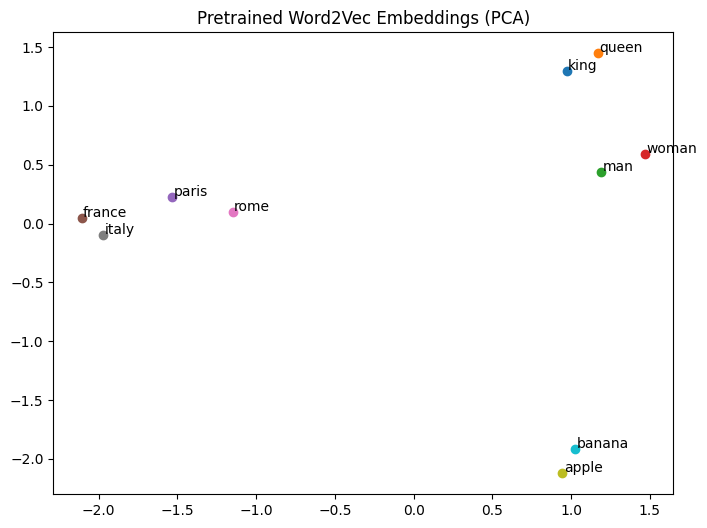

In [3]:
def visualize_words(words, model):
    vectors = []
    labels = []
    
    for word in words:
        if word in model:
            vectors.append(model[word])
            labels.append(word)
    
    pca = PCA(n_components=2)
    reduced = pca.fit_transform(vectors)
    
    plt.figure(figsize=(8, 6))
    for i, label in enumerate(labels):
        x, y = reduced[i]
        plt.scatter(x, y)
        plt.annotate(label, (x + 0.01, y + 0.01))
    plt.title("Pretrained Word2Vec Embeddings (PCA)")
    plt.show()

words_to_plot = ['king', 'queen', 'man', 'woman', 'paris', 'france', 'rome', 'italy', 'apple', 'banana']
visualize_words(words_to_plot, model)

In [4]:
def analogy(positive, negative, model, topn=5):
    """Performs a word analogy using positive and negative examples.

    Args:
        positive (list of str): Words to add to the analogy (e.g., ['king', 'woman']).
        negative (list of str): Words to subtract from the analogy (e.g., ['man']).
        model: The pretrained Word2Vec model.
        topn (int): The number of most similar words to return.

    Returns:
        list of tuples or None: A list of (word, similarity) tuples, or None if any of the words are not in the vocabulary.
    """
    for word in positive + negative:
        if word not in model.key_to_index:
            print(f"'{word}' not found in the vocabulary.")
            return None

    similar_words = model.most_similar(positive=positive, negative=negative, topn=topn)
    return similar_words

# Perform the analogy: king - man + woman = ?
positive_terms = ["king", "woman"]
negative_terms = ["man"]
analogy_result = analogy(positive_terms, negative_terms, model)

if analogy_result:
    print(f"Analogy for: king - man + woman")
    for word, similarity in analogy_result:
        print(f"{word}: {similarity:.4f}")
else:
    print("Could not find a suitable analogy.")

Analogy for: king - man + woman
queen: 0.7118
monarch: 0.6190
princess: 0.5902
crown_prince: 0.5499
prince: 0.5377
